# Latitudes y longitudes

Usando GeonamesCache se busca agregar las latitudes y longitudes de las ciudades, dado que así se puede conocer posteriormente en que país están, esto ya que solo se cuenta con 15 países nombrado textualmente. Esto se hará utilizando el archivo JSON de las ciudades escritas con acentos.

In [ ]:
gc = geonamescache.GeonamesCache()

with open("city_accent_mapping.json", "r") as fin:
    city_accented_mapping = json.loads(fin.read())

data["accented_city"] = data["City"].map(city_accented_mapping)
data[data["City"] != data["accented_city"]].head()

,Headlines,Country,City,accented_city
6,Geneve Scientists Battle to Find Cure,NaN,Geneve,Genève
8,Zika Infested Monkeys in Sao Paulo,NaN,Sao Paulo,São Paulo
16,Louisiana Zika cases up to 26,NaN,NaN,NaN
18,Zika infects pregnant woman in Cebu,NaN,NaN,NaN
46,18 new Zika Cases in Bogota,NaN,Bogota,Bogotá


Se imprime el ejemplo de la ciudad de Sao Paulo, donde se ve su población, latitud y longitud. Esto utilizando la lista con las ciudades con acentos, se ve que no se logra identificar cuando esta unaccented.

In [ ]:
print(gc.get_cities_by_name('São Paulo'))

[{'3448439': {'geonameid': 3448439, 'name': 'São Paulo', 'latitude': -23.5475, 'longitude': -46.63611, 'countrycode': 'BR', 'population': 12400232, 'timezone': 'America/Sao_Paulo', 'admin1code': '27', 'alternatenames': ['SAO', 'Sampa', 'San Paolo', 'San Paul ed Brasil', 'San Paulas', 'San Paulo', 'San Paulu', 'San Paulu du Brasili', 'San Paulu dû Brasili', 'San Pauluw', 'San Pawlo', 'San Polo del Braxil', 'San Poulo', 'San Poło del Braxil', 'San Pàul ëd Brasil', 'San-Paulo', 'San-Paulu', 'San-Paŭlo', 'Sanpaulu', 'Sao Paolo', 'Sao Paulo', 'Sao Paulo capital', 'Saun Paulu', 'Sawo Palo', 'Sawo Pålo', 'São Paolo', 'São Paulo', 'São Paulo capital', 'Urbs Paulistana', 'cavo pavulo', "sa'o pa'ulo", "sa'o paulo", "samu pa'ulu", 'sangpaollo', 'sangpaollu', 'sangpaullo', 'sangpaullu', 'sankt. paulos', 'sanpauro', 'savea pealea', 'savo palo', 'saw bawlw', 'saw palw', 'saw pwlw', 'saywpaywlw', 'sea pea lu', 'sheng bao luo', 'Σάο Πάολο', 'Сан Пауло', 'Сан Паулу', 'Сан-Паулу', 'Сан-Паўлу', 'Сао Паол

In [ ]:
print(gc.get_cities_by_name('Sao Paulo'))

[]


La forma de tratar las ciudades duplicadas es elegir la ciudad que tenga la mayor población, ya que aunque pueda traer errores, es más probable que el titular nombre una ciudad que tenga una gran población a una con menor.

In [ ]:
city = 'Boston'
gc.get_cities_by_name(city)

[{'2655138': {'geonameid': 2655138,
   'name': 'Boston',
   'latitude': 52.97633,
   'longitude': -0.02664,
   'countrycode': 'GB',
   'population': 41340,
   'timezone': 'Europe/London',
   'admin1code': 'ENG',
   'alternatenames': ['Boston',
    'Boston i England',
    'Bostonas',
    'boseuteon',
    'bosuton',
    'bwstn',
    'Бостон',
    'بوستون، لینکلن\u200cشر',
    'بوسطن',
    'ボストン',
    '보스턴']}},
 {'4930956': {'geonameid': 4930956,
   'name': 'Boston',
   'latitude': 42.35843,
   'longitude': -71.05977,
   'countrycode': 'US',
   'population': 675647,
   'timezone': 'America/New_York',
   'admin1code': 'MA',
   'alternatenames': ['BOS',
    'Baston',
    'Bostan',
    'Boston',
    'Bostona',
    'Bostonas',
    'Bostone',
    'Bostonia',
    'Bostono',
    'Bostons',
    'Bostun',
    'Bostún',
    'Mushauwomuk',
    'Old Boston',
    'Po-su-tun',
    'Pokekona',
    'Pô-sṳ-tun',
    'Shawmut',
    'Shawmutt',
    'Shawnnut',
    'Totant',
    'Tramount',
    'Tremont',
  

Se ve que hay 2 Boston y la con mayor población es la de Estados Unidos por lo que se escogerá esa.

In [ ]:
matches = gc.get_cities_by_name(city)
matches = [{k: v for k, v in list(match.values())[0].items()} for match in matches]
matches = sorted(matches, key=lambda x: x["population"], reverse=True)
matches

[{'geonameid': 4930956,
  'name': 'Boston',
  'latitude': 42.35843,
  'longitude': -71.05977,
  'countrycode': 'US',
  'population': 675647,
  'timezone': 'America/New_York',
  'admin1code': 'MA',
  'alternatenames': ['BOS',
   'Baston',
   'Bostan',
   'Boston',
   'Bostona',
   'Bostonas',
   'Bostone',
   'Bostonia',
   'Bostono',
   'Bostons',
   'Bostun',
   'Bostún',
   'Mushauwomuk',
   'Old Boston',
   'Po-su-tun',
   'Pokekona',
   'Pô-sṳ-tun',
   'Shawmut',
   'Shawmutt',
   'Shawnnut',
   'Totant',
   'Tramount',
   'Tremont',
   'Trimountain',
   'Trimountaine',
   'Vostoni',
   'Wahstoronon:ke',
   'Wahstoronòn:ke',
   'Wastok',
   'bastan',
   'bastana',
   'bausatana',
   'beasrraൺ',
   'bo shi dun',
   'boseuteon',
   'bostan',
   'bostana',
   'bostʼoni',
   'bosuton',
   'bwstn',
   'bwstwn',
   'bxstan',
   'pastan',
   'Βοστωνη',
   'Βοστώνη',
   'Бостан',
   'Бостон',
   'Бостън',
   'Բոստոն',
   'באסטאן',
   'בוסטון',
   'بوستون',
   'بوسطن',
   'بوسٹن',
   'بۆستن

Se buscan todas las ciudades en los titulares. Y si hay matches, se elije la con mayor población.

In [ ]:
city_locations = []
for city in data["accented_city"]:
    matches = gc.get_cities_by_name(city)
    if matches:
        matches = [
            {k: v for k, v in list(match.values())[0].items()} for match in matches
        ]
        matches = sorted(matches, key=lambda x: x["population"], reverse=True)
        match = matches[0]
        city_locations.append(
            {
                "name": match["name"],
                "latitude": match["latitude"],
                "longitude": match["longitude"],
                "countrycode": match["countrycode"],
                "pop": match["population"],
            }
        )

city_locations[-5:]

[{'name': 'Jerusalem',
  'latitude': 31.76904,
  'longitude': 35.21633,
  'countrycode': 'IL',
  'pop': 971800},
 {'name': 'Indang',
  'latitude': 14.19528,
  'longitude': 120.87694,
  'countrycode': 'PH',
  'pop': 41159},
 {'name': 'Suva',
  'latitude': -18.13683,
  'longitude': 178.42531,
  'countrycode': 'FJ',
  'pop': 77366},
 {'name': 'Bella Vista',
  'latitude': 18.45539,
  'longitude': -69.9454,
  'countrycode': 'DO',
  'pop': 175683},
 {'name': 'Wichita Falls',
  'latitude': 33.91371,
  'longitude': -98.49339,
  'countrycode': 'US',
  'pop': 104710}]

Se convierte la lista de las locaciones a un df.

In [ ]:
city_locations = pd.DataFrame(city_locations)
city_locations.tail()

,name,latitude,longitude,countrycode,pop
599,Jerusalem,31.76904,35.21633,IL,971800
600,Indang,14.19528,120.87694,PH,41159
601,Suva,-18.13683,178.42531,FJ,77366
602,Bella Vista,18.45539,-69.94540,DO,175683
603,Wichita Falls,33.91371,-98.49339,US,104710


In [ ]:
city_locations = city_locations.drop_duplicates()
print(f"We have the locations for {city_locations.shape[0]} unique cities.")

We have the locations for 574 unique cities.


Se unen las ciudades junto a los nombres de las ciudades con acentos.

In [ ]:
data = pd.merge(
    data, city_locations, left_on="accented_city", right_on="name", how="left"
)
data.head()

,Headlines,Country,City,accented_city,name,latitude,longitude,countrycode,pop
0,Could Zika Reach New York City?,NaN,New York City,New York City,New York City,40.71427,-74.00597,US,8804190.0
1,First Case of Zika in Miami Beach,NaN,Miami Beach,Miami Beach,Miami Beach,25.79065,-80.13005,US,92312.0
2,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife,Recife,Recife,-8.05389,-34.88111,BR,1653461.0
3,Dallas man comes down with case of Zika,NaN,Dallas,Dallas,Dallas,32.78306,-96.80667,US,1300092.0
4,Trinidad confirms first Zika case,NaN,Trinidad,Trinidad,Trinidad,-14.83333,-64.90000,BO,84259.0


Se comprueba que funcionó el elegir la ciudad repetida con mayor población, esto buscando Boston y viendo que si quedó la ubicada en Estados Unidos.

In [ ]:
data[data['City'] == 'Boston']

,Headlines,Country,City,accented_city,name,latitude,longitude,countrycode,pop
26,Flu season hits Boston,NaN,Boston,Boston,Boston,42.35843,-71.05977,US,675647.0


In [ ]:
data[data['City'] == 'Rochester']

,Headlines,Country,City,accented_city,name,latitude,longitude,countrycode,pop
83,Rochester authorities confirmed the spread of Dengue,NaN,Rochester,Rochester,Rochester,43.15478,-77.61556,US,209802.0
297,Herpes Keeps Spreading in Rochester,NaN,Rochester,Rochester,Rochester,43.15478,-77.61556,US,209802.0


Se buscan los valores perdidos de cada índice, donde se ve que en países hay muchos datos perdidos.

<Axes: title={'center': 'Missing values by column'}>

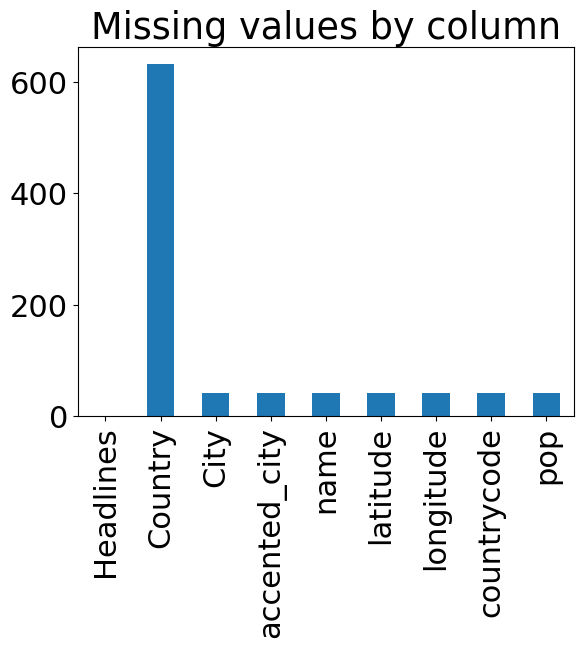

In [ ]:
data.isna().sum().plot.bar(title='Missing values by column')

Al haber muchos datos perdidos en países se decide botar esa columna ya que no entrega mucha información. 

In [ ]:
data = data.drop(columns=['Country'])

Se buscan los titulares donde no aparecen sus ciudades, pero se ve que en en este si se distinguen ciudades, solo que al parecer estas no se encuentran en GeonamesCache. Aquí se deberán eliminar estas ciudades ya que no serán útiles.

In [ ]:
pd.options.display.max_colwidth = 100

no_name = data[data["name"].isna()].copy()

print(f"There are {len(no_name)} headlines without a city.")

no_name.tail()

There are 42 headlines without a city.


,Headlines,City,accented_city,name,latitude,longitude,countrycode,pop
595,Zika arrives in Dangriga,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600,More Patients in Maynard are Getting Diagnosed with Syphilis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
624,Zika case reported in Antioquia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
626,Chikungunya has not Left Pismo Beach,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627,Zika spreads to La Joya,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
city_set = set(city_accented_mapping.keys())

for City in ["Dangriga", "Maynard", "Antioquia", "Pismo Beach", "La Joya"]:
    if City in city_set:
        print("Found ", City)
    else:
        print("Did Not Find City")

Did Not Find City
Did Not Find City
Did Not Find City
Did Not Find City
Did Not Find City


In [ ]:
data = data.dropna(subset=['name'])
data.describe()

,latitude,longitude,pop
count,604.000000,604.000000,6.040000e+02
mean,26.683511,-38.068211,9.974999e+05
std,20.629250,79.433887,2.318401e+06
min,-53.787690,-156.506040,1.338100e+04
25%,15.671793,-90.343035,5.869225e+04
50%,33.544030,-76.348955,1.823535e+05
75%,40.719617,7.195387,6.852645e+05
max,59.938630,179.364510,1.896074e+07


In [ ]:
print(f'We have the city locations for {len(data)} cities.')

We have the city locations for 604 cities.


<Axes: title={'center': 'Histogram of population'}, ylabel='Frequency'>

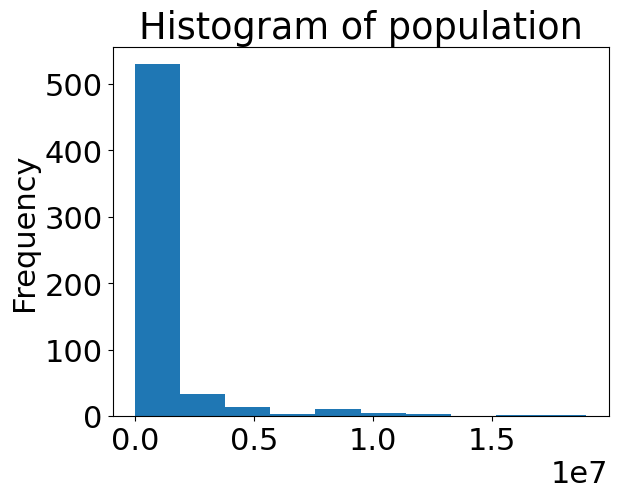

In [ ]:
data['pop'].plot.hist(title='Histogram of population')

Ploteando longitud y latitud se puede ver que los puntos se asimilan a un mapa.

<Axes: title={'center': 'Latitude and Longitude'}, xlabel='longitude', ylabel='latitude'>

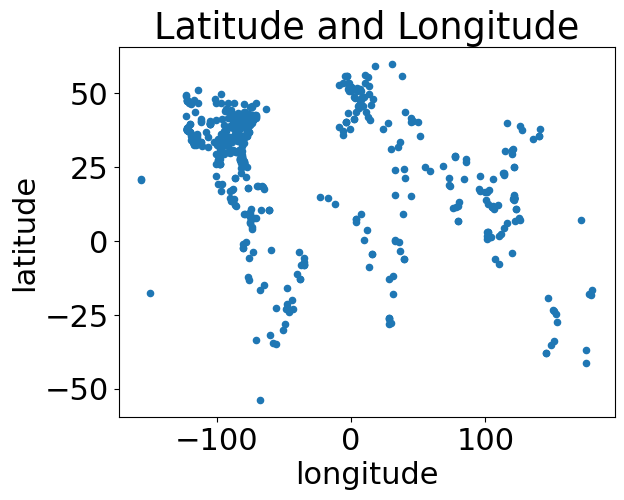

In [ ]:
data.plot.scatter(
    x="longitude", y="latitude", title="Latitude and Longitude")

Se elimina la columna 'name' ya que no entrega nueva información.

In [ ]:
data = data.drop(columns=['name'])
data.tail()

,Headlines,City,accented_city,latitude,longitude,countrycode,pop
641,Rumors about Rabies spreading in Jerusalem have been refuted,Jerusalem,Jerusalem,31.76904,35.21633,IL,971800.0
642,More Zika patients reported in Indang,Indang,Indang,14.19528,120.87694,PH,41159.0
643,Suva authorities confirmed the spread of Rotavirus,Suva,Suva,-18.13683,178.42531,FJ,77366.0
644,More Zika patients reported in Bella Vista,Bella Vista,Bella Vista,18.45539,-69.94540,DO,175683.0
645,Zika Outbreak in Wichita Falls,Wichita Falls,Wichita Falls,33.91371,-98.49339,US,104710.0


Con todo esto, se obtiene un DataFrame limpio y con toda la información necesaria para poder localizar las enfermedades según las ciudades y titulares.

In [ ]:
data[['Headlines', 'City', 'latitude', 'longitude', 'countrycode']].head(10)

,Headlines,City,latitude,longitude,countrycode
0,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US
1,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US
2,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR
3,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US
4,Trinidad confirms first Zika case,Trinidad,-14.83333,-64.90000,BO
5,Zika Concerns are Spreading in Houston,Houston,29.76328,-95.36327,US
6,Geneve Scientists Battle to Find Cure,Geneve,46.20222,6.14569,CH
7,The CDC in Atlanta is Growing Worried,Atlanta,33.74900,-84.38798,US
8,Zika Infested Monkeys in Sao Paulo,Sao Paulo,-23.54750,-46.63611,BR
9,Brownsville teen contracts Zika virus,Brownsville,25.90175,-97.49748,US


In [ ]:
data.to_csv('processed_headlines_locations.csv')